## Импорты и настройки


In [ ]:
# %pip install ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Подключение Google диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Настройка выводов
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
info_dict = {
    "ID": "Номер записи",
    "shop_id": "Порядковый номер магазина",
    "item_id": "Порядковый номер товара",
    "item_category_id": "Порядковый номер категории",
    "item_cnt_day": "Продано за день",
    "item_price": "Цена товрара",
    "date": "Дата продажи dd/mm/yyyy",
    "date_block_num": "Порядковый номер месяца, используемый для удобства",
    "item_name": "Название товара",
    "shop_name": "Название магазина",
    "item_category_name": "Название категории товара",
}

In [ ]:
# Датафрейм с информацией о переменных
def descr_features(data):
    features = data.dtypes.to_frame(name="data_type")# Тип даных в столбце
    features["meaning"] = [info_dict.get(x, "new") for x in features.index] # Текстовое описание
    features["n_NaN"] = data.isna().sum() # Количество пропущенных значений
    features["%NaN"] = round(features["n_NaN"] / len(data) * 100, 2) # Процент пропущенных значений
    features["nunique"] = data.nunique().values # Количество уникальных значений
    describe_df = data.describe(include="all").round(1).T
    features = pd.merge(features, describe_df.round(0),  how="left", left_index=True, right_index=True) # Информация describe()
    return features

## Загрузка данных

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS-practice/data/sales_train.csv")
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
# Парсинг дат
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df["day"] = df["date"].apply(lambda x: x.day)
df["month"] = df["date"].apply(lambda x: x.month)
df["year"] = df["date"].apply(lambda x: x.year)

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/DS-practice/data/test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
items = pd.read_csv("/content/drive/MyDrive/DS-practice/data/items.csv")
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
shops = pd.read_csv("/content/drive/MyDrive/DS-practice/data/shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
df = df.merge(items, on="item_id", how="outer")
df = df.merge(shops, on="shop_id", how="outer")
# del items, shops

In [ ]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_name,item_category_id,shop_name
0,NaT,1.0,0.0,30,265.0,2.0,NaN,NaN,NaN,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,"!Якутск Орджоникидзе, 56 фран"
1,NaT,1.0,0.0,30,265.0,2.0,NaN,NaN,NaN,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,"!Якутск Орджоникидзе, 56 фран"
2,NaT,1.0,0.0,30,265.0,4.0,NaN,NaN,NaN,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,"!Якутск Орджоникидзе, 56 фран"
3,NaT,1.0,0.0,30,265.0,4.0,NaN,NaN,NaN,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,"!Якутск Орджоникидзе, 56 фран"
4,NaT,1.0,0.0,30,265.0,9.0,NaN,NaN,NaN,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,"!Якутск Орджоникидзе, 56 фран"


## Проверка качества данных

In [ ]:
descr_features(df)

,data_type,meaning,n_NaN,%NaN,nunique,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,datetime64[ns],Дата продажи dd/mm/yyyy,1784511,60.78,408,1151701,NaN,NaN,NaN,2014-04-02 08:37:33.184812032,2013-01-01 00:00:00,2013-07-11 00:00:00,2014-03-04 00:00:00,2014-11-11 00:00:00,2015-12-10 00:00:00,NaN
date_block_num,float64,"Порядковый номер месяца, используемый для удоб...",363,0.01,34,2935849.0,NaN,NaN,NaN,14.6,0.0,7.0,14.0,23.0,33.0,9.4
shop_id,float64,Порядковый номер магазина,363,0.01,60,2935849.0,NaN,NaN,NaN,33.0,0.0,22.0,31.0,47.0,59.0,16.2
item_id,int64,Порядковый номер товара,0,0.00,22170,2936212.0,NaN,NaN,NaN,10197.2,0.0,4476.0,9343.0,15684.0,22169.0,6324.3
item_price,float64,Цена товрара,363,0.01,19993,2935849.0,NaN,NaN,NaN,890.9,-1.0,249.0,399.0,999.0,307980.0,1729.8
item_cnt_day,float64,Продано за день,363,0.01,198,2935849.0,NaN,NaN,NaN,1.2,-22.0,1.0,1.0,1.0,2169.0,2.6
day,float64,new,1784511,60.78,12,1151701.0,NaN,NaN,NaN,5.9,1.0,3.0,6.0,9.0,12.0,3.5
month,float64,new,1784511,60.78,12,1151701.0,NaN,NaN,NaN,6.4,1.0,3.0,6.0,9.0,12.0,3.4
year,float64,new,1784511,60.78,3,1151701.0,NaN,NaN,NaN,2013.8,2013.0,2013.0,2014.0,2014.0,2015.0,0.8
item_name,object,Название товара,0,0.00,22170,2936212,22170,Фирменный пакет майка 1С Интерес белый (34*42)...,31340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Заполним пропуски пока дефолтными значениями
df["shop_name"] = df["shop_name"].fillna("no")
df["item_cnt_day"] = df["item_cnt_day"].fillna(0)
df["item_price"] = df["item_price"].fillna(0)
df["date_block_num"] = df["date_block_num"].fillna(35)

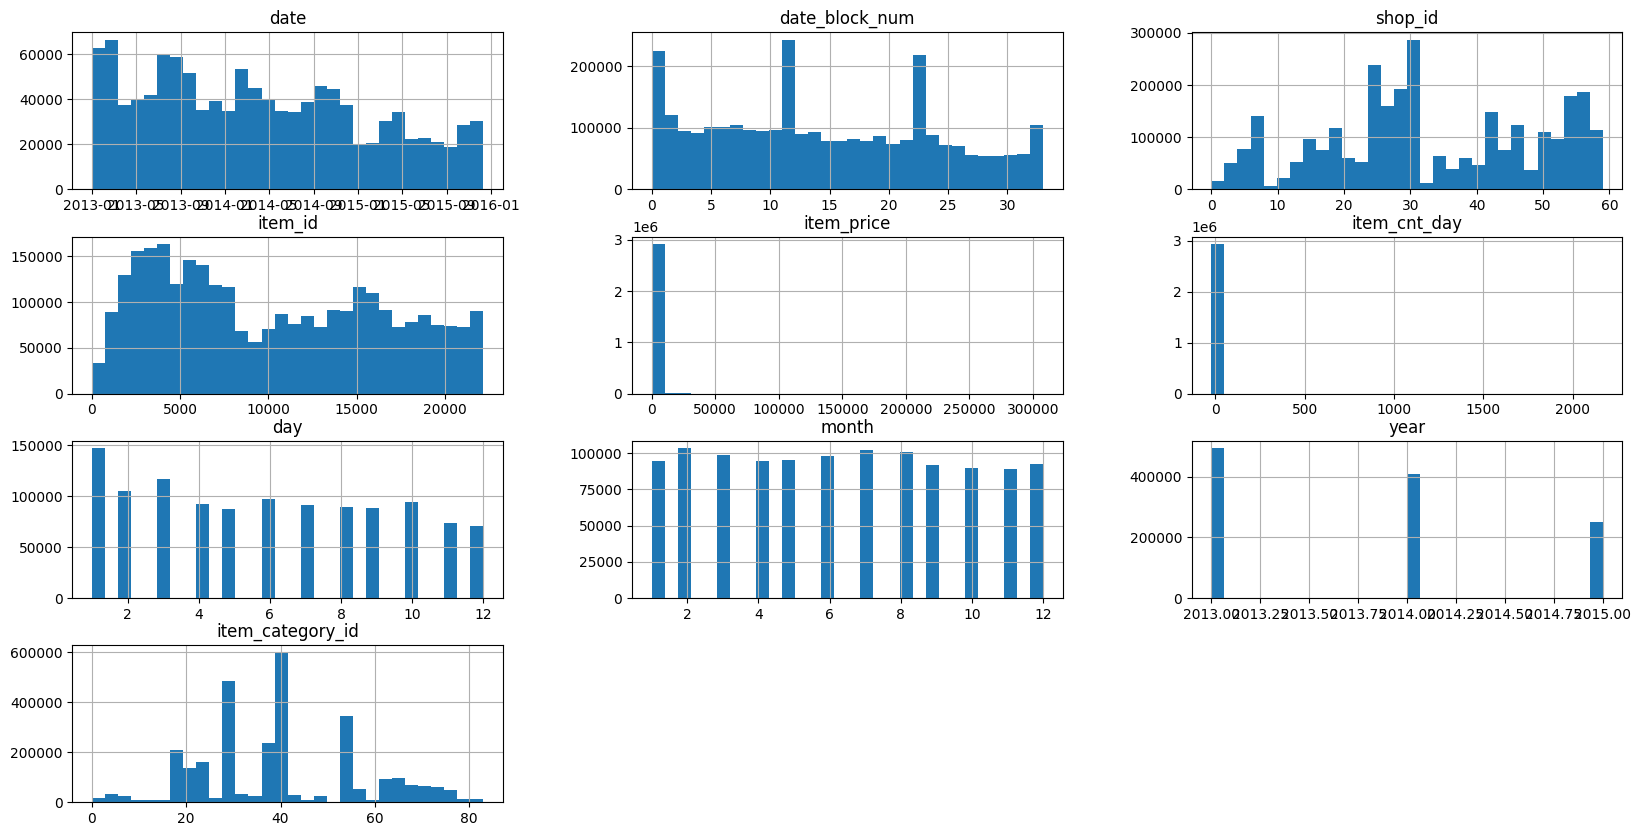

In [ ]:
df.hist(bins=30, figsize=(20, 10), sharex=False);

### Полнота (Completeness)

**Вывод:** в данных есть пропуски, следовательно они неполные.

### Уникальность (Uniqueness)

In [ ]:
sorted(df["shop_name"].unique())

['!Якутск Орджоникидзе, 56 фран',
 '!Якутск ТЦ "Центральный" фран',
 'no',
 'Адыгея ТЦ "Мега"',
 'Балашиха ТРК "Октябрь-Киномир"',
 'Волжский ТЦ "Волга Молл"',
 'Вологда ТРЦ "Мармелад"',
 'Воронеж (Плехановская, 13)',
 'Воронеж ТРЦ "Максимир"',
 'Воронеж ТРЦ Сити-Парк "Град"',
 'Выездная Торговля',
 'Жуковский ул. Чкалова 39м?',
 'Жуковский ул. Чкалова 39м²',
 'Интернет-магазин ЧС',
 'Казань ТЦ "Бехетле"',
 'Казань ТЦ "ПаркХаус" II',
 'Калуга ТРЦ "XXI век"',
 'Коломна ТЦ "Рио"',
 'Красноярск ТЦ "Взлетка Плаза"',
 'Красноярск ТЦ "Июнь"',
 'Курск ТЦ "Пушкинский"',
 'Москва "Распродажа"',
 'Москва МТРЦ "Афи Молл"',
 'Москва Магазин С21',
 'Москва ТК "Буденовский" (пав.А2)',
 'Москва ТК "Буденовский" (пав.К7)',
 'Москва ТРК "Атриум"',
 'Москва ТЦ "Ареал" (Беляево)',
 'Москва ТЦ "МЕГА Белая Дача II"',
 'Москва ТЦ "МЕГА Теплый Стан" II',
 'Москва ТЦ "Новый век" (Новокосино)',
 'Москва ТЦ "Перловский"',
 'Москва ТЦ "Семеновский"',
 'Москва ТЦ "Серебряный Дом"',
 'Мытищи ТРК "XL-3"',
 'Н.Новго

Некоторые названия магазинов встречаются по 2 раза: Якутск Орджоникидзе, 56; Якутск ТЦ "Центральный; Жуковский ул. Чкалова 39м².

In [ ]:
shops_list = ['!Якутск Орджоникидзе, 56 фран','!Якутск ТЦ "Центральный" фран',
              'Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²',
              'Якутск Орджоникидзе, 56','Якутск ТЦ "Центральный"', ]
shops[shops["shop_name"].isin(shops_list)]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
10,Жуковский ул. Чкалова 39м?,10
11,Жуковский ул. Чкалова 39м²,11
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58


In [ ]:
# Якутск Орджоникидзе, 56
df.loc[df.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
df.loc[df.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
df.loc[df.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [ ]:
print(f"Количество дубликатов в товарах по id: {items['item_id'].duplicated().sum()}")

print(f"Количество дубликатов в товарах: {items.duplicated().sum()}")
print(f"Процент дубликатов в товарах: {items.duplicated().sum()/df.shape[0]}\n")

Количество дубликатов в товарах по id: 0
Количество дубликатов в товарах: 0
Процент дубликатов в товарах: 0.0



In [ ]:
print(f"Количество дубликатов в магазинах по id: {shops['shop_id'].duplicated().sum()}")

print(f"Количество дубликатов в магазинах: {shops.duplicated().sum()}")
print(f"Процент дубликатов в магазинах: {shops.duplicated().sum()/df.shape[0]}\n")

Количество дубликатов в магазинах по id: 0
Количество дубликатов в магазинах: 0
Процент дубликатов в магазинах: 0.0



In [ ]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print(f"Процент дубликатов: {df.duplicated().sum()/df.shape[0]}\n")

Количество дубликатов: 487011
Процент дубликатов: 0.16586370466437708



**Вывод:** условие уникальности полностью не выполняется, процент дубликатов в данных больше 15%.

### Согласованность (Consistency)

In [ ]:
# Группировка по году и месяцу, получение уникальных date_block_num
aggregated = df.groupby(['year', 'month'])['date_block_num'].unique().reset_index()

# Вывод результата
aggregated

,year,month,date_block_num
0,2013.0,1.0,"[1.0, 2.0, 5.0, 9.0, 0.0, 11.0, 6.0, 10.0, 4.0..."
1,2013.0,2.0,"[1.0, 2.0, 10.0, 0.0, 3.0, 6.0, 11.0, 8.0, 7.0..."
2,2013.0,3.0,"[0.0, 1.0, 9.0, 6.0, 2.0, 7.0, 11.0, 10.0, 8.0..."
3,2013.0,4.0,"[1.0, 0.0, 3.0, 2.0, 8.0, 9.0, 7.0, 11.0, 5.0,..."
4,2013.0,5.0,"[1.0, 0.0, 6.0, 4.0, 10.0, 7.0, 2.0, 5.0, 8.0,..."
5,2013.0,6.0,"[1.0, 0.0, 10.0, 6.0, 2.0, 9.0, 4.0, 11.0, 7.0..."
6,2013.0,7.0,"[1.0, 0.0, 8.0, 6.0, 9.0, 2.0, 7.0, 11.0, 10.0..."
7,2013.0,8.0,"[1.0, 0.0, 4.0, 2.0, 9.0, 11.0, 5.0, 10.0, 7.0..."
8,2013.0,9.0,"[1.0, 0.0, 6.0, 4.0, 10.0, 11.0, 9.0, 5.0, 7.0..."
9,2013.0,10.0,"[1.0, 0.0, 3.0, 8.0, 5.0, 2.0, 11.0, 7.0, 10.0..."


**Вывод:** в описании датасета на Kaggle видим, что date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33. То есть каждому месяцу определённого года должен соответствовать единственный номер блока даты, однако из построенной таблицы видим, что строгого соответствия нет. Все другие признаки согласованны.

In [ ]:
df.corr(numeric_only=True)["date_block_num"]

,date_block_num
date_block_num,1.000000
shop_id,-0.008510
item_id,0.009356
item_price,0.095010
item_cnt_day,0.009402
day,0.244054
month,0.006252
year,0.931501
item_category_id,0.029128


Исходя также из корреляции с целевым признаком можно сделать вывод, что признак date_block_num практически не информативен.

### Актуальность (Timeliness)

In [ ]:
print("Годы наблюдений в тренировочной выборке:", df.year.unique())

Годы наблюдений в тренировочной выборке: [  nan 2013. 2014. 2015.]


**Вывод:** данные актуальны так как мы делаем прогноз на ноябрь 2015 года.

### Точность (Accuracy)

In [ ]:
df["item_price"].min()

-1.0

In [ ]:
df[df["item_price"]==-1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_name,item_category_id,shop_name
1645106,NaT,4.0,32.0,2973,-1.0,1.0,NaN,NaN,NaN,"DmC Devil May Cry [PS3, русские субтитры]",19,"Москва ТЦ ""Серебряный Дом"""


**Вывод:** в признаке цены есть значение -1, в остальном данные точны.

###Валидность (Validity)

In [ ]:
df["item_cnt_day"].dtype

dtype('float64')

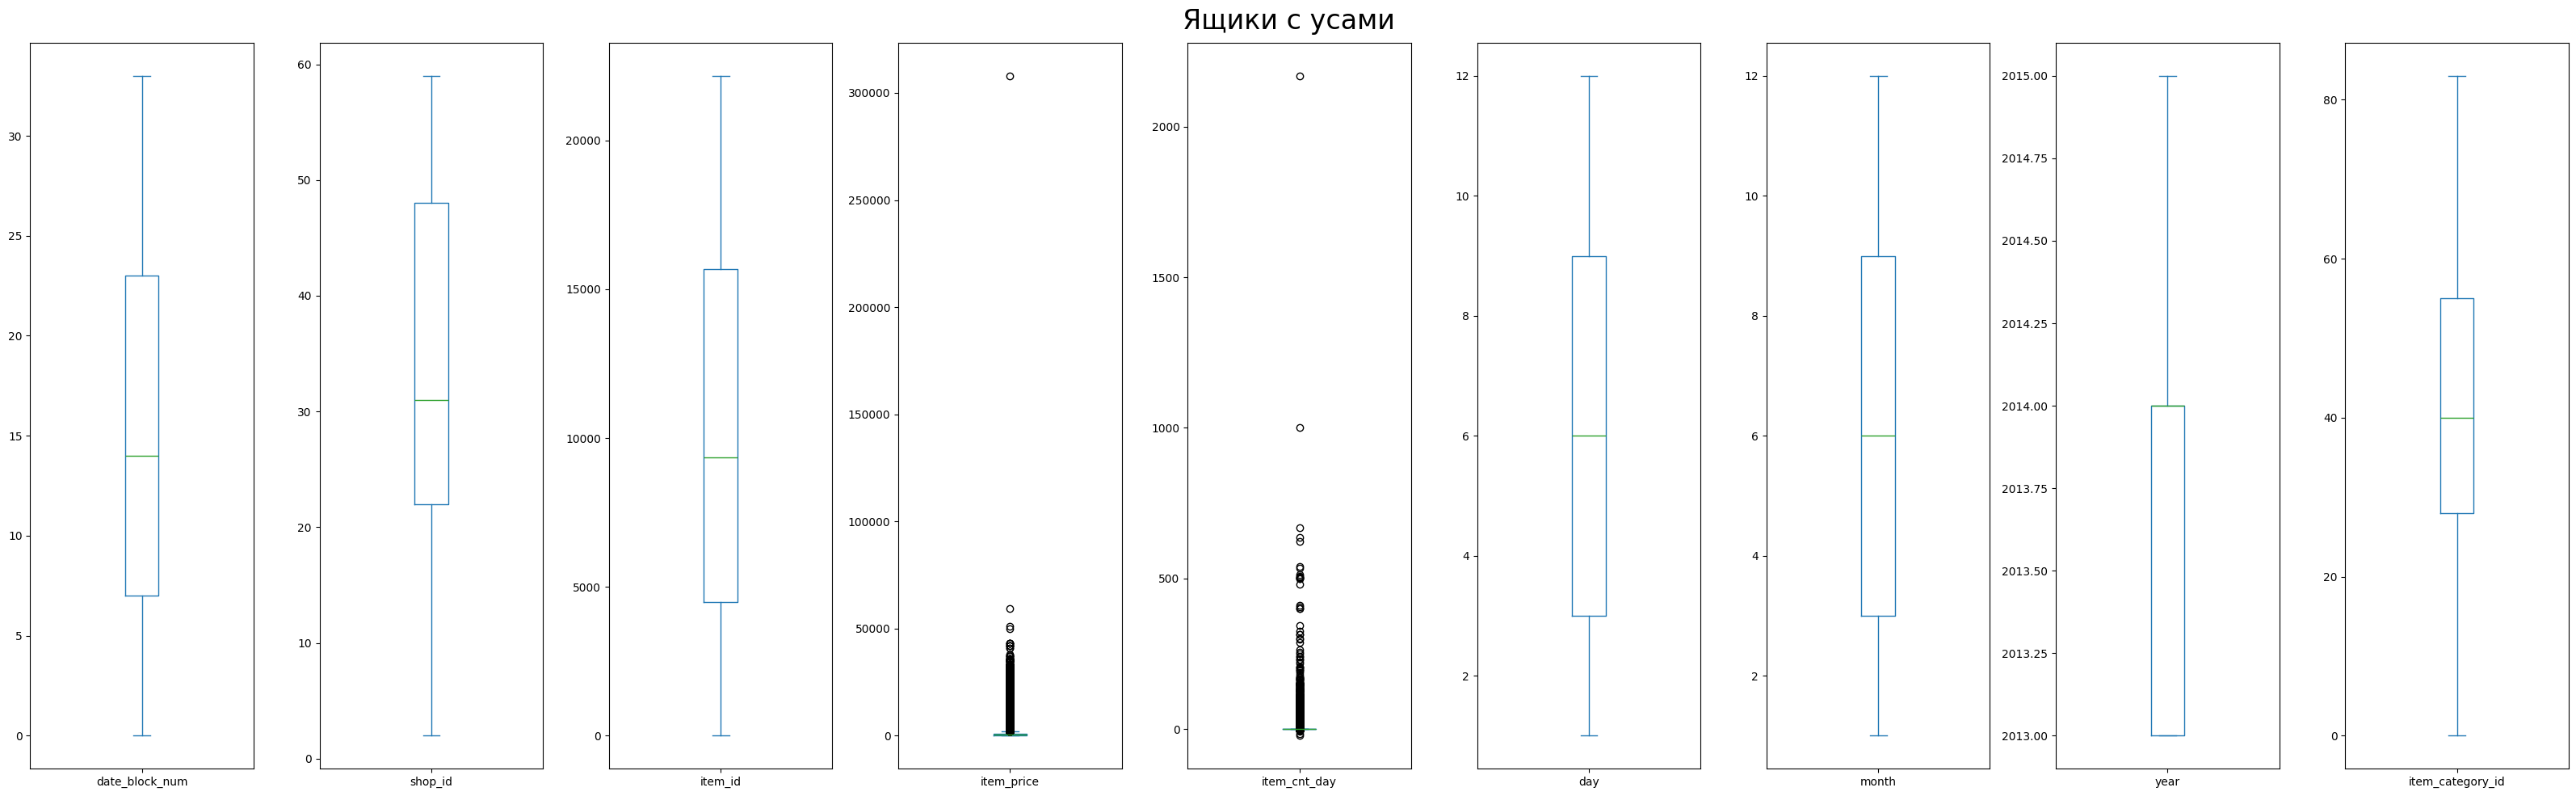

In [ ]:
# Построение боксплотов
ax = df.plot(kind="box", subplots=True, figsize=(32, 10))

# Добавление заголовка по центру с увеличенным размером шрифта
plt.suptitle("Ящики с усами", fontsize=24, x=0.5)

# Настройка макета
plt.tight_layout()

**Вывод:** признак кличества проданных товаров имеет целочисленный тип, целесообразно привести тип float в int. В принаках цены и количества проданных тваров есть выбросы, однако эти значения не ошибка, а вполне вероятные большие значения. Исходные данные вылидны.

### Однозначность (Clarity)

**Вывод:** Данные однозначны. Каждому товару соответсвует 1 категория и название. Каждому магазину соответствует 1 название. В признаках значения атомарны.

### Итог

**ВЫВОД О КАЧЕСТВЕ ДАННЫХ:** данные хорошего качества, размер датафрейма подходит для обучения моделей. Необходимы удаление дубликатов и неинформативных признаков, приведение типов, обработка выбросов и некорректных значений.

## Очистка дубликатов и приведение типов

In [ ]:
df.drop_duplicates(inplace=True)
print(f"Количество дубликатов: {df.duplicated().sum()}")
print(f"Процент дубликатов: {df.duplicated().sum()/df.shape[0]}\n")

Количество дубликатов: 0
Процент дубликатов: 0.0



In [ ]:
df["item_cnt_day"] = df["item_cnt_day"].astype("int64")

In [ ]:
# Удаление строки с отрицательной ценой товара
df.drop(df[df["item_price"]==-1].index, inplace=True)
df[df["item_price"]==-1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_name,item_category_id,shop_name
